## Time Series Data in Python: Visualisation #
- About dataset:  historical stock (2016 to 2026) market data for major global technology companies (These companies include - Facebook,Amazon,Apple,Netflix, Nvidia, Google also known as FAANG), enriched with technical analysis indicators and a next-day closing price prediction target.
Each row represents one trading day for one company (Source: [text]([https://finance.yahoo.com/quote/TSLA.](https://www.kaggle.com/datasets/specter7/amazon-amzn-historical-stock-price-data/data)))
- Variables:
1. Open/High/Low/Close: Daily price movements.
- The opening price of the stock - "Open"
- The high price of that day - "High"
- The low price of that day - "Low"
- The closed price of that day - "Close"
2. Volume: Number of shares traded. 



**LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
#INDEX IMPORTED DATASET
data = pd.read_csv("faang_stock_prices.csv", parse_dates=['Date'], index_col='Date')
print(data)

           Ticker        Open        High         Low       Close     Volume  \
Date                                                                           
2016-02-23   AAPL   21.853144   21.875812   21.433763   21.465500  127770400   
2016-02-23   AMZN   27.777500   27.845501   27.266500   27.646999   81016000   
2016-02-23  GOOGL   36.032746   36.270944   35.515157   35.595547   41332000   
2016-02-23   META  106.108789  106.724491  104.390794  104.728432   25319300   
2016-02-23   MSFT   46.158514   46.184970   44.959133   45.135513   28895300   
...           ...         ...         ...         ...         ...        ...   
2026-01-22   AMZN  234.050003  235.720001  230.899994  234.339996   31913300   
2026-01-22  GOOGL  334.450012  335.149994  328.750000  330.540009   26253600   
2026-01-22   META  629.349976  660.570007  626.549988  647.630005   21394700   
2026-01-22   MSFT  447.619995  452.839996  444.700012  451.140015   25349400   
2026-01-22   NVDA  184.750000  186.16999

In [11]:
data

,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
Date,,,,,,,,,,,,,,,,,,
2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
2016-02-23,AMZN,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,50.230010,-0.598529,-0.896261,31.103668,22.908382,-0.011725,0.022486,27.702000
2016-02-23,GOOGL,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,28.846871,-0.209017,-0.219158,38.439218,33.798573,-0.016131,0.015153,35.774696
2016-02-23,META,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,34.031434,1.216863,1.318966,115.829165,92.886882,-0.015864,0.019720,106.138588
2016-02-23,MSFT,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,42.877882,0.038144,-0.096534,48.143898,42.459504,-0.027920,0.019161,45.294239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-22,AMZN,234.050003,235.720001,230.899994,234.339996,31913300,236.171426,236.013333,236.263937,235.039321,53.529872,1.224615,2.202436,248.520707,224.264292,0.013099,0.017721,239.160004
2026-01-22,GOOGL,334.450012,335.149994,328.750000,330.540009,26253600,330.787144,321.977620,326.886086,320.764595,67.582193,6.121491,6.383337,339.589684,305.585319,0.006578,0.014879,327.929993
2026-01-22,META,629.349976,660.570007,626.549988,647.630005,21394700,621.767151,645.427618,632.259363,640.510804,45.687381,-8.251442,-5.985550,684.649099,604.598899,0.056562,0.028988,658.760010


In [ ]:
#Select columns of interest
data2=data[["Date","Open"]]
#Check for missing information
data2.info()

In [ ]:
#Convert the Date to a dateformat 
data2["Date"]=pd.to_datetime(data["Date"])
#view result
data2.info()

In [ ]:
#Select columns of interest (opening prices of stock)
data2=data[["Date"," Open"]]
data2

## 1. Time Plots:
- X-axis: Time
- Y-axis: dependent variable

In [ ]:
# Time plot
plt.figure(figsize=(7, 5))
plt.plot(data2.index, data2['Open'], marker='o', linestyle='-', markersize=5)
plt.xlabel('Date')
plt.ylabel('Stock Opening Price')
plt.title('Stock Opening Prices of Major Tech Companies (2016-2026)')
plt.grid(True)
plt.show()

## 2. Histrogram/Density Plots
- Estimates probability density function
- Suited to large datasets that are continuous

In [ ]:
# Histogram and Density Plot
plt.figure(figsize=(7, 5))
sns.histplot(data2['Open'], kde=True)
plt.xlabel('Number of Opening Prices')
plt.ylabel('Frequency')
plt.title('Histogram/Density Plot')
plt.grid(True)
plt.show()

## 3. Autocorrelation Plot (ACF)

In [ ]:
# Autocorrelation Plot
plt.figure(figsize=(7,5))
plot_acf(data2['Open'], lags=50)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.grid(True)
plt.show()

## 4. Moving Average Plot
- Visualisation that also smoothens data

In [ ]:
# Moving Average Plot
plt.figure(figsize=(7, 5))
values = data2['Open']

# 7-day moving average
rolling_mean = values.rolling(window=25).mean()
plt.plot(values, label='Original')
plt.plot(rolling_mean, label='25-day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Moving Average Plot')
plt.legend()
plt.grid(True)
plt.show()

## 5. Interpreting ACF Plots

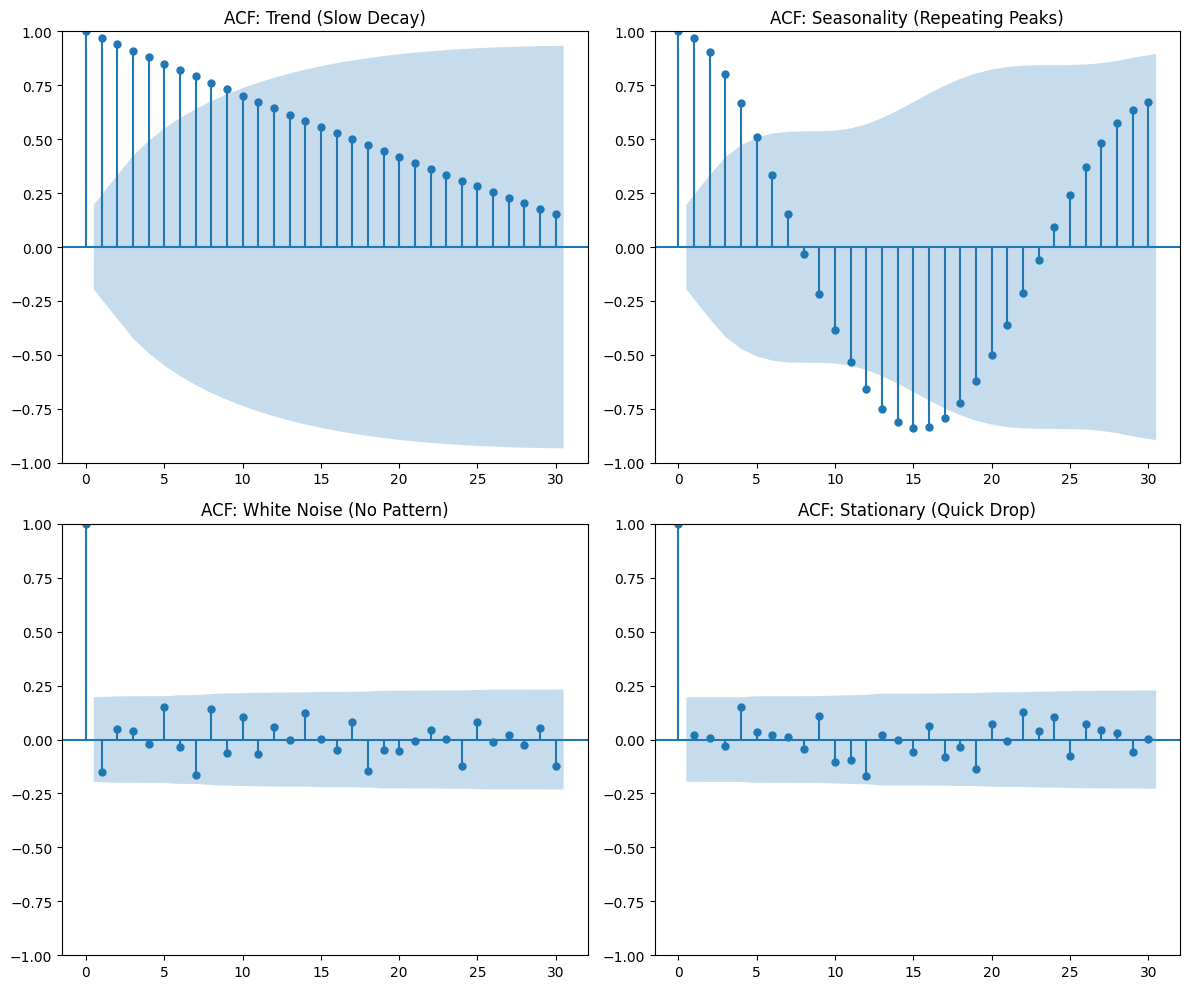

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generate dummy data types
t = np.linspace(0, 20, 100)
trend = t                                      # Linear Trend
season = np.sin(t)                             # Seasonality
noise = np.random.normal(0, 1, 100)            # White Noise
stationary = 0.5 * np.random.randn(100)        # Quick decay (AR process simulation)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Trend ACF
plot_acf(trend, lags=30, ax=axes[0,0], title="ACF: Trend (Slow Decay)")

# 2. Seasonality ACF
plot_acf(season, lags=30, ax=axes[0,1], title="ACF: Seasonality (Repeating Peaks)")

# 3. White Noise ACF
plot_acf(noise, lags=30, ax=axes[1,0], title="ACF: White Noise (No Pattern)")

# 4. Stationary ACF (Simulated)
# Note: Real stationary data drops off quickly
plot_acf(stationary, lags=30, ax=axes[1,1], title="ACF: Stationary (Quick Drop)")

plt.tight_layout()
plt.show()

## 6. COMPARING TIME PLOTS, LAG PLOTS AND ACF PLOTS

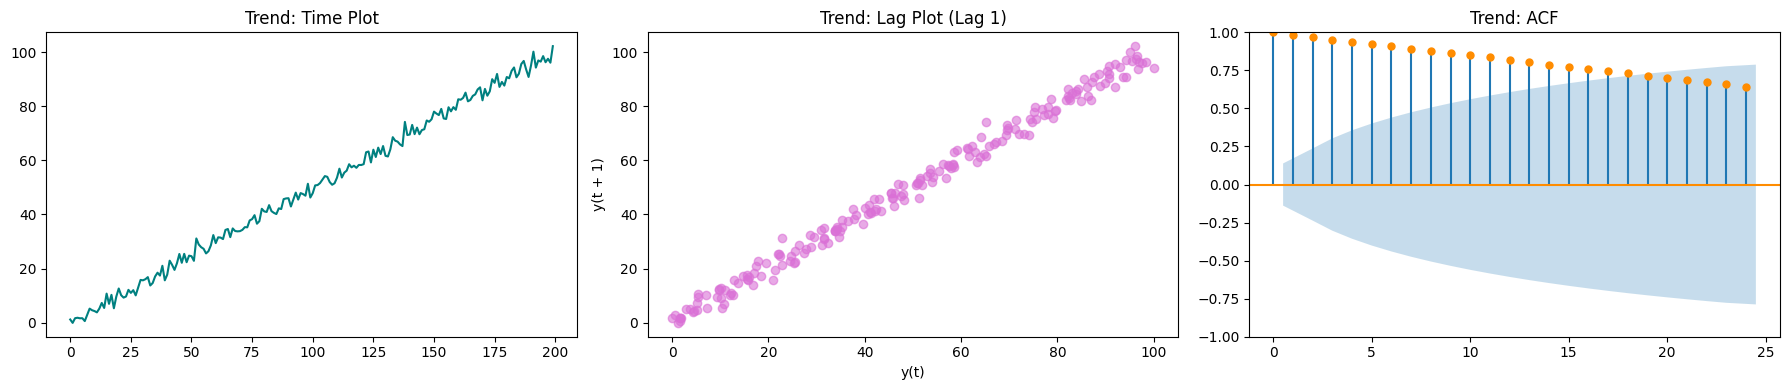

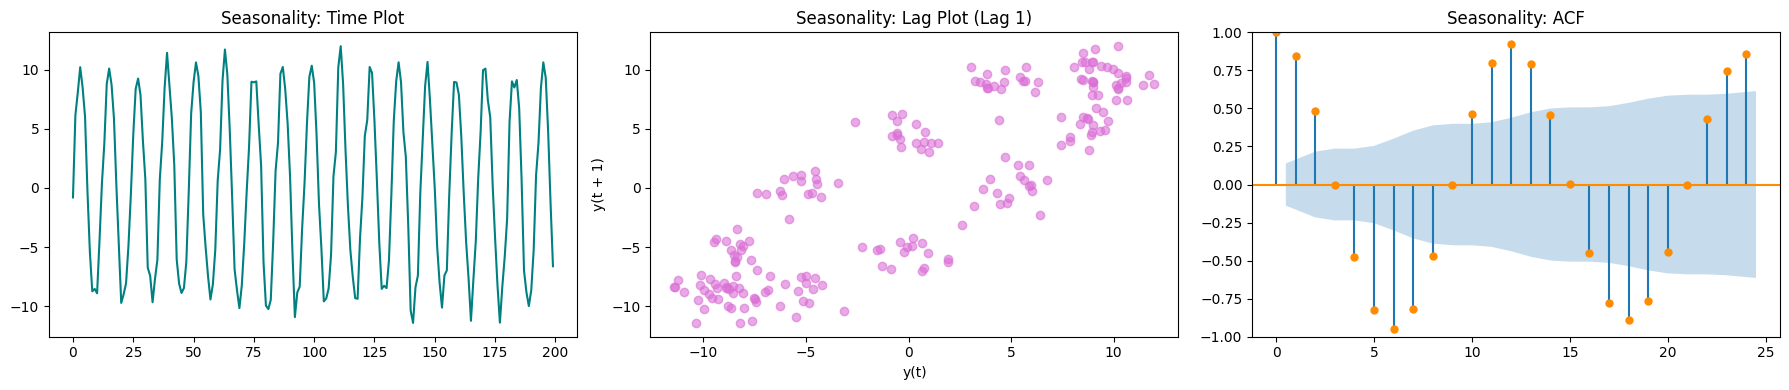

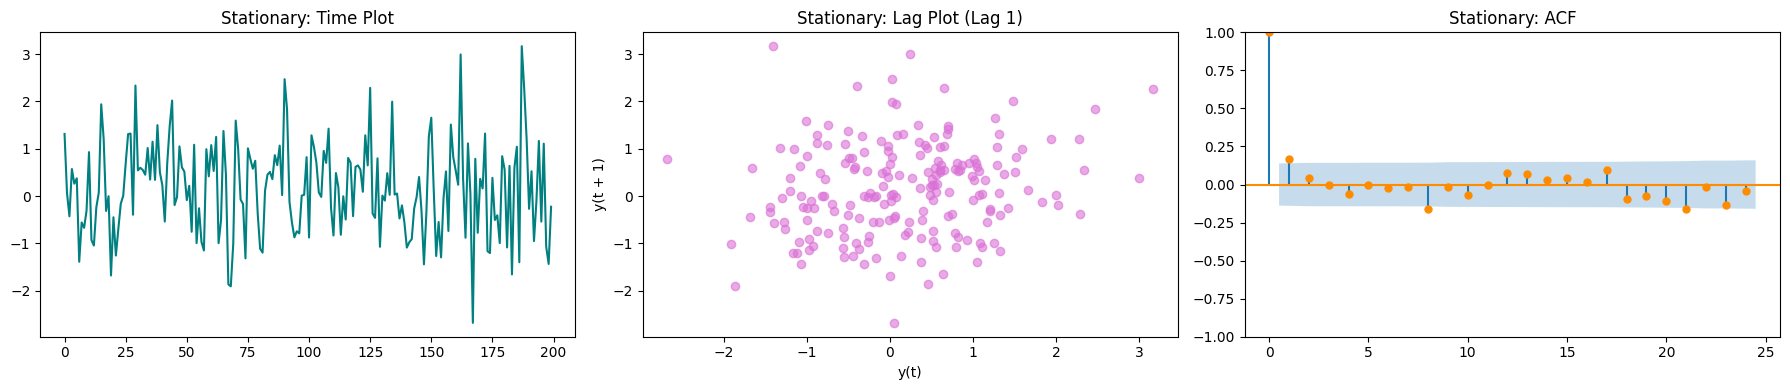

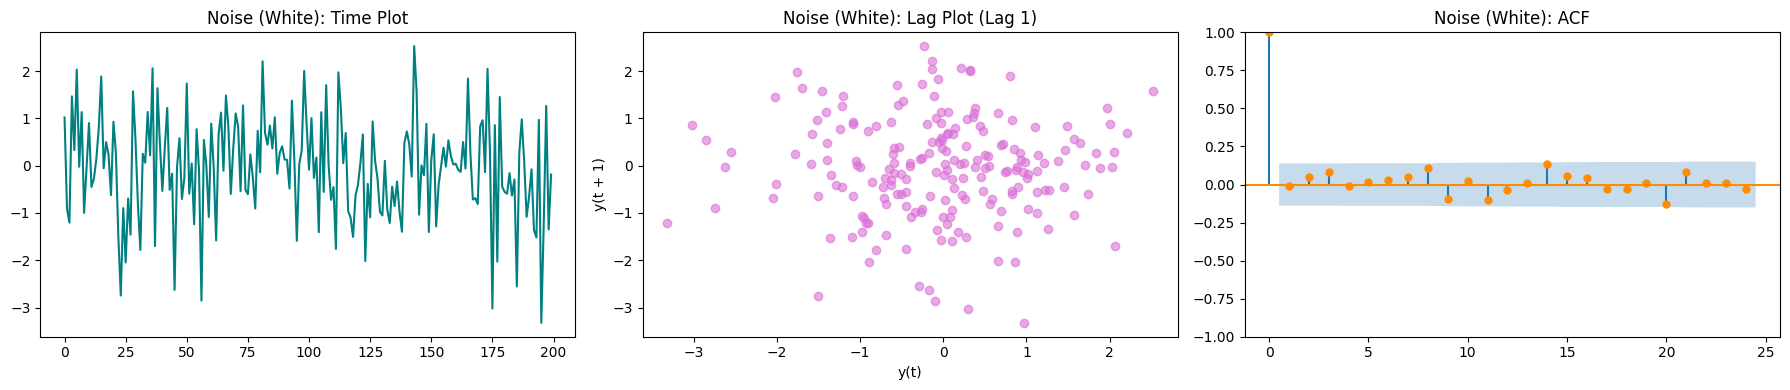

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import lag_plot

# 1. Generate Synthetic Data
n = 200
time = np.arange(n)

data_dict = {
    "Trend": 0.5 * time + np.random.normal(0, 2, n),
    "Seasonality": 10 * np.sin(2 * np.pi * time / 12) + np.random.normal(0, 1, n),
    "Stationary": np.random.normal(0, 1, n),
    "Noise (White)": np.random.standard_normal(n)
}

# 2. Plotting Function
def compare_plots(data, title):
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    
    # Time Plot
    axes[0].plot(data, color='teal')
    axes[0].set_title(f"{title}: Time Plot")
    
    # Lag Plot (Lag 1)
    lag_plot(pd.Series(data), ax=axes[1], c='orchid', alpha=0.6)
    axes[1].set_title(f"{title}: Lag Plot (Lag 1)")
    
    # ACF Plot
    plot_acf(data, ax=axes[2], color='darkorange', title=f"{title}: ACF")
    
    plt.tight_layout()

# Execute for each type
for label, values in data_dict.items():
    compare_plots(values, label)

plt.show()

In [1]:
!pip3 install notebook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 412.6 kB/s  0:00:49m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 1.4 MB/s  0:00:09m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 882.4 kB/s  0:00:11m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48/48 [notebook]notebook]jupyterlab]]erver]
